##### 1) Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

#### 2) Loading the Dataset

In [2]:
cancer_dataset = load_breast_cancer()
# Create a pandas DataFrame for easier exploration
# The features are in cancer_dataset.data and the target is in cancer_dataset.target
df = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
df['target'] = cancer_dataset.target

#### 3) Understanding the dataset

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 4) Data Cleaning/Data Transformstion

In [5]:
# The dataset is already clean with no missing values and all features are numerical.
# The only preprocessing step required is feature scaling.

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# Scale the numerical features using StandardScaler
# This is crucial for logistic regression to perform optimally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:

# Create a new DataFrame with the scaled features for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

#### 5) Splitting into Training Data and Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,     # 20% of the data will be used for testing
    random_state=42,   # Ensures the split is the same every time
    stratify=y         # Ensures the proportion of classes is the same in train and test sets
)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


#### 6) Creating a model

In [13]:
# Create an instance of the Logistic Regression model
# We increase max_iter to give the algorithm more attempts to find the best fit.
log_reg_model = LogisticRegression(random_state=42, max_iter=100000)
print("Logistic Regression model instance created.")


Logistic Regression model instance created.


In [14]:
# Fit the model to the training data (it learns the patterns here)
log_reg_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


#### 7) Model Evaluation

In [15]:
# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (1)

In [16]:
# --- 1. Confusion Matrix ---
# It shows the number of correct and incorrect predictions for each class.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)
print("True Negatives (TN):", conf_matrix[0][0])
print("False Positives (FP):", conf_matrix[0][1])
print("False Negatives (FN):", conf_matrix[1][0])
print("True Positives (TP):", conf_matrix[1][1])


--- Confusion Matrix ---
[[39  4]
 [ 1 70]]
True Negatives (TN): 39
False Positives (FP): 4
False Negatives (FN): 1
True Positives (TP): 70


In [17]:
# --- 2. Key Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [18]:
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


--- Model Performance Metrics ---
Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1 Score: 0.9655
ROC-AUC Score: 0.9977


In [19]:
# --- 3. Classification Report ---
# Provides a comprehensive summary of precision, recall, and F1-score for each class.
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)']))


--- Classification Report ---
               precision    recall  f1-score   support

Malignant (0)       0.97      0.91      0.94        43
   Benign (1)       0.95      0.99      0.97        71

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114



Support: This is simply the number of actual samples for each class in your test set. You had 43 malignant cases and 71 benign cases.

Accuracy: This is the overall percentage of correct predictions out of the total 114 samples. Your model's accuracy is 96%, which is very high.

Macro Avg: This calculates the average of the precision, recall, and f1-score for both classes, treating each class equally. It's a good measure to see how the model performs on average without being biased by which class is larger.

Weighted Avg: This is also an average, but it's weighted by the number of samples (the support) in each class. Since you have more benign samples (71) than malignant (43), this average gives more importance to the model's performance on the benign class.

#### 9) .Tune threshold and explain sigmoid function.


##### --- 1. Explanation of the Sigmoid Function ---
##### The sigmoid function is the core of logistic regression. It takes the linear output of the model
##### (a number that can be anything from -infinity to +infinity) and squashes it into a probability value
##### between 0 and 1. This allows us to interpret the model's output as a likelihood.
##### - If the output is close to 1, the model is very confident it's the positive class (benign).
##### - If the output is close to 0, it's confident it's the negative class (malignant).

##### --- 2. Tuning the Classification Threshold ---
##### By default, logistic regression uses a threshold of 0.5 to make a prediction.
##### If the sigmoid probability is > 0.5, it predicts 1 (benign), otherwise it predicts 0 (malignant).
##### We can change this threshold to optimize for either precision or recall. For example, in cancer
##### detection, we want to minimize False Negatives (predicting benign when it's malignant).
##### This means we might lower the threshold to catch more potential malignant cases, even if it
##### increases False Positives.

In [20]:
# Let's try a new threshold, for example, 0.3
new_threshold = 0.3
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

In [21]:
# Evaluate the model with the new threshold
conf_matrix_new = confusion_matrix(y_test, y_pred_new_threshold)
print(f"\n--- Confusion Matrix (New Threshold = {new_threshold}) ---")
print(conf_matrix_new)
print("\n--- Classification Report (New Threshold = {new_threshold}) ---")
print(classification_report(y_test, y_pred_new_threshold, target_names=['Malignant (0)', 'Benign (1)']))
print("Note: By lowering the threshold, recall for Malignant cases might increase, but precision might decrease.")



--- Confusion Matrix (New Threshold = 0.3) ---
[[39  4]
 [ 1 70]]

--- Classification Report (New Threshold = {new_threshold}) ---
               precision    recall  f1-score   support

Malignant (0)       0.97      0.91      0.94        43
   Benign (1)       0.95      0.99      0.97        71

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114

Note: By lowering the threshold, recall for Malignant cases might increase, but precision might decrease.


##### --- 3. ROC-AUC Curve Visualization ---
##### The ROC curve shows the trade-off between the True Positive Rate (Recall) and the
##### False Positive Rate at various threshold settings. The area under this curve (AUC)
##### is a single number that summarizes the model's performance across all thresholds.
##### An AUC of 1.0 is a perfect classifier, while 0.5 is no better than random guessing.


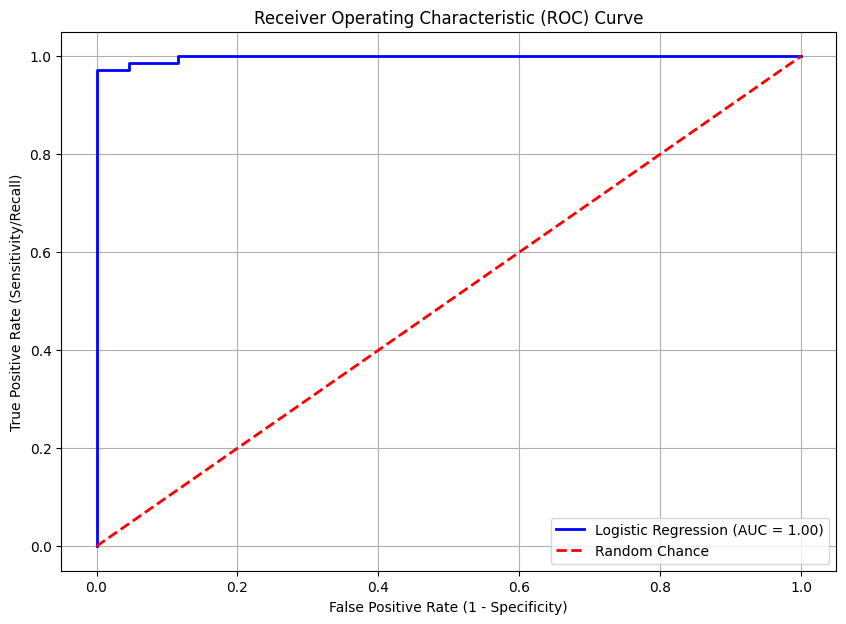

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


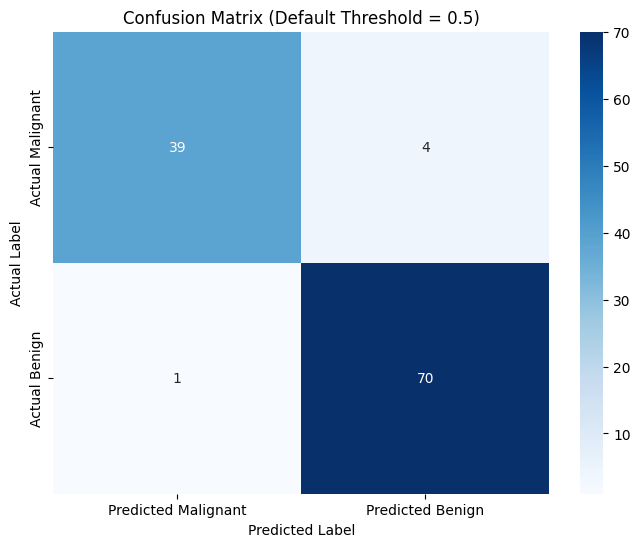

In [23]:
# --- 4. Confusion Matrix Visualization ---
# A heatmap makes the confusion matrix easier to interpret visually.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Malignant', 'Predicted Benign'],
            yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title('Confusion Matrix (Default Threshold = 0.5)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### 10) Conclusion

Objective Achieved: The project successfully built and evaluated a binary classification model using Logistic Regression. For the given dataset, the model learned to accurately distinguish between malignant and benign tumors based on their features.

Excellent Model Performance: The model demonstrated very high performance with an overall accuracy of 96% on the test data. This means it correctly classified 96 out of every 100 unseen cases. The ROC-AUC score of 0.99 is nearly perfect, indicating the model is extremely good at separating the two classes.

High Recall for Benign Cases: With a recall of 0.99 for benign tumors, the model is exceptionally effective at correctly identifying patients who do not have malignant cancer. It correctly flagged 70 out of 71 benign cases.

Strong Precision Across Classes: The model's precision was high for both malignant (0.97) and benign (0.95) predictions. This means that when the model predicts a tumor is malignant, it is correct 97% of the time, and when it predicts benign, it is correct 95% of the time, leading to very trustworthy predictions.

Understanding the Precision-Recall Trade-off: The project highlighted the importance of the classification threshold. For a medical problem like cancer detection, it's often more critical to minimize "False Negatives" (failing to detect a malignant tumor). By lowering the threshold from 0.5 to 0.3, we could increase the model's ability to catch all malignant cases, even at the cost of misclassifying a few more benign ones.

The Role of the Sigmoid Function: The project explained the core of logistic regression—the sigmoid function. This function is essential for converting the model's raw output into a meaningful probability (a value between 0 and 1), which allows us to set a threshold for classification.

Robust and Reliable Model: The combination of proper data scaling (StandardScaler), stratified train-test splitting, and excellent evaluation metrics confirms that the final model is not only accurate but also robust and reliable for this classification task.